# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [250]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import statsmodels.formula.api as smf
from scipy import stats
#import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [198]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [199]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 counts

#### Question 2. Create a summary table

In [200]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


234040.0
115.628513092


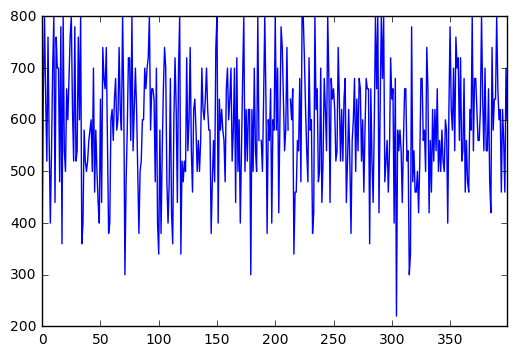

In [201]:
print df_raw['gre'].sum()
print df_raw['gre'].std()

df_raw['gre'].plot()

1349.59
0.380630380057


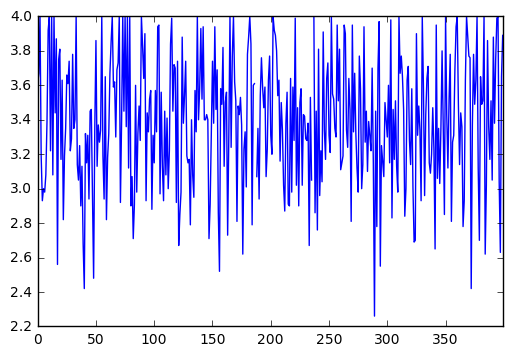

In [202]:
print df_raw['gpa'].sum()
print df_raw['gpa'].std()
df_raw['gpa'].plot()

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: By looking at the min and max value for the GRE and GPA columns it could be compared that GPA has a wider range of data compared to GPA data.

Also by plotting the graph for both GRE and GPA it shows that the GRE has a more variation of data (Between 0 to 800) compared to the variation of GPA data ( Between 0 to 4.0). Since GRE has a wider variation of data so the STD of GRE is more than the GRE of GPA

#### Question 4. Drop data points with missing data


In [203]:
print df_raw['gre'].count()

df_raw['gre'].dropna()
print df_raw['gre'].count()

admit_null_row_cnt = df_raw[df_raw.admit.isnull()]
print "No of Null ADMIT rows is : {}".format(len(admit_null_row_cnt))

gre_null_row_cnt = df_raw[df_raw.gre.isnull()]
print "No of Null GRE rows is : {}".format(len(gre_null_row_cnt))

gpa_null_row_cnt = df_raw[df_raw.gpa.isnull()]
print "No of Null GPA rows is : {}".format(len(gpa_null_row_cnt))

prestige_null_row_cnt = df_raw[df_raw.prestige.isnull()]
print "No of Null PRESTIGE rows is : {}".format(len(prestige_null_row_cnt))

#plt.figure()
#df_raw.plot(figsize=(15,8))

398
398
No of Null ADMIT rows is : 0
No of Null GRE rows is : 2
No of Null GPA rows is : 2
No of Null PRESTIGE rows is : 1


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [204]:
print df_raw[df_raw.admit.isnull()]

print df_raw[df_raw.gre.isnull()]

print df_raw[df_raw.gpa.isnull()]

print df_raw[df_raw.prestige.isnull()]

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
     admit  gre   gpa  prestige
187      0  NaN   NaN       2.0
212      0  NaN  2.87       2.0
     admit    gre  gpa  prestige
187      0    NaN  NaN       2.0
236      1  660.0  NaN       NaN
     admit    gre  gpa  prestige
236      1  660.0  NaN       NaN


    Answer: Printing the null rows for each column shows the exact number of missing data for each column. Ideally the count method should have returned the total count including the null data and then by applying the dropna() method on the column it should return the number of rows excluding the null rows to prove that the null values were dropped.

#### Question 6. Create box plots for GRE and GPA

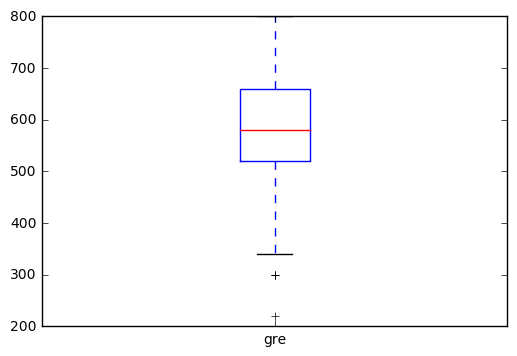

In [205]:
#boxplot 1
df_raw['gre'].plot(kind='box')

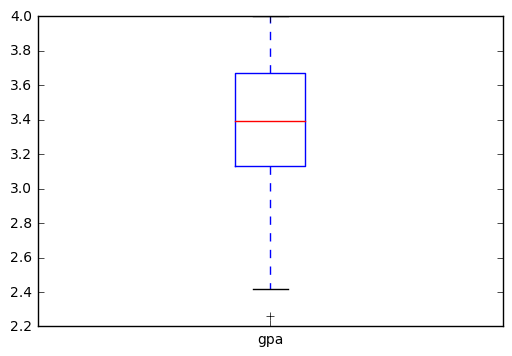

In [206]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: A Box plot shows the Mean of the sample data and also divides the data sample into four quartiles.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1257a5650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12572b3d0>]], dtype=object)

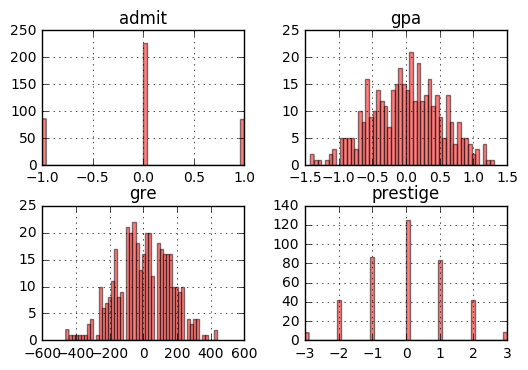

In [227]:
# plot the distribution of each variable
#df_raw['admit'].plot(kind='line',figsize=(15,10))
df_raw.diff().hist(color='r', alpha=0.5, bins=50)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

    Answer: Yes. GRE and GPA have lower Skewness so they seem almost normal. Below analysis performed to show the Skewness, Kurtosis and the density graph for GRE and GPA

In [222]:
print "Printing Skewness of each data points:"
print df_raw.skew()
print('\n')
print "Printing Kurtosis of each data points:"
print df_raw.kurt()

Printing Skewness of each data points:
admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64


Printing Kurtosis of each data points:
admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64


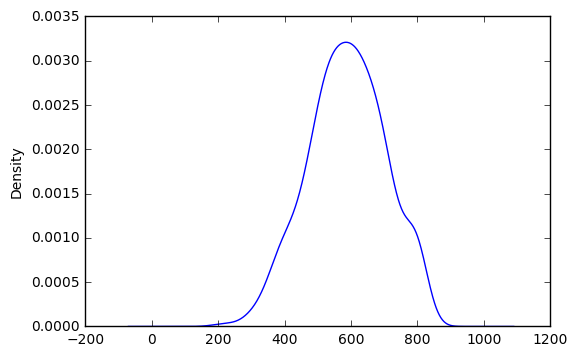

In [248]:
df_raw['gre'].plot(kind='density')
#plt.vlines(df_raw.mean(),ymin=0.0000,ymax=0.0035,color="red")   # Plot red line at mean



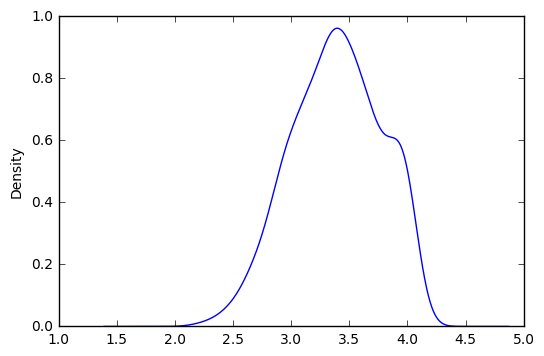

In [240]:
df_raw['gpa'].plot(kind='density')

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. The GRE and GPA data as plotted above doesn't seems completely normally distributed

#### Question 11. Which of our variables are potentially colinear? 

In [224]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: The corelation between GRE and admit is highest among GRE, GPA and Prestige. This could be the most likely factor for admission.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Students who attended a top under graduate school has a higher percentage of getting admission to a graduate school

#### Question 14. What is your hypothesis? 

Answer: GPA score and Prestiage of a school is the deciding factor for getting admission to a school.


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data